In [82]:
import os

# 数据处理工具
import pandas as pd
import numpy as np
import random as rnd

# 可视化工具
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 用于测试集的划分
from sklearn.model_selection import train_test_split

#进度条工具
from tqdm import tqdm

### 导入训练集与测试集，train.csv，test.csv，userFeature.data，adFeature.csv放在当前data/目录即可，data目录已被gitignore屏蔽，不会被提交

In [85]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
ad_feature = pd.read_csv('data/adFeature.csv')

### 探索数据集

In [39]:
train_df.head()

,aid,uid,label
0,1,1,1
1,2,2,1
2,3,3,-1
3,4,4,-1
4,5,5,1


In [40]:
test_df.head()

,aid,uid
0,76,76
1,77,77
2,78,78
3,79,79
4,80,80


In [41]:
ad_feature.head()

,aid,advertisedId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType
0,0,32,43,32,124,45,65,24
1,1,32,43,32,124,45,65,24
2,2,32,43,32,124,45,65,24
3,3,32,43,32,124,45,65,24
4,4,32,43,32,124,45,65,24


In [42]:
user_feature.head()

,uid,age,gender,marriageStatus,education,consumptionAbility,LBS,interest1,interest2,interest3,...,kw3,topic1,topic2,topic3,appIdInstall,appIdAction,ct,os,carrier,house
0,0,7,1,0,3,1,6,1 2,3,3,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
1,1,7,1,0,3,1,6,1 2,3,3,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
2,2,7,1,0,3,1,6,1 2,3,3,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
3,3,7,1,0,3,1,6,1 2,3,3,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
4,4,2,1,0,3,1,6,1 2,3,3,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1


In [10]:
ad_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
aid             8 non-null int64
advertisedId    8 non-null int64
campaignId      8 non-null int64
creativeId      8 non-null int64
creativeSize    8 non-null int64
adCategoryId    8 non-null int64
productId       8 non-null int64
productType     8 non-null int64
dtypes: int64(8)
memory usage: 592.0 bytes


In [11]:
user_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 24 columns):
uid                   9 non-null int64
age                   9 non-null int64
gender                9 non-null int64
marriageStatus        9 non-null int64
education             9 non-null int64
consumptionAbility    9 non-null int64
LBS                   9 non-null int64
interest1             9 non-null object
interest2             9 non-null int64
interest3             9 non-null int64
interest4             9 non-null int64
interest5             9 non-null int64
kw1                   9 non-null int64
kw2                   9 non-null int64
kw3                   9 non-null int64
topic1                9 non-null int64
topic2                9 non-null int64
topic3                9 non-null int64
appIdInstall          9 non-null object
appIdAction           9 non-null object
ct                    9 non-null int64
os                    9 non-null int64
carrier               9 non-null int64

In [12]:
ad_feature.describe()

,aid,advertisedId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType
count,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
mean,0.0,32.0,43.0,32.0,124.0,45.0,65.0,24.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,32.0,43.0,32.0,124.0,45.0,65.0,24.0
25%,0.0,32.0,43.0,32.0,124.0,45.0,65.0,24.0
50%,0.0,32.0,43.0,32.0,124.0,45.0,65.0,24.0
75%,0.0,32.0,43.0,32.0,124.0,45.0,65.0,24.0
max,0.0,32.0,43.0,32.0,124.0,45.0,65.0,24.0


In [13]:
user_feature.describe()

,uid,age,gender,marriageStatus,education,consumptionAbility,LBS,interest2,interest3,interest4,...,kw1,kw2,kw3,topic1,topic2,topic3,ct,os,carrier,house
count,9.000000,9.000000,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
mean,4.222222,6.555556,1.0,0.0,3.0,1.0,6.0,3.0,3.0,4.0,...,3.0,3.0,2.0,34.0,35.0,65.0,3.0,1.0,2.0,1.0
std,3.153481,1.740051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,2.000000,1.0,0.0,3.0,1.0,6.0,3.0,3.0,4.0,...,3.0,3.0,2.0,34.0,35.0,65.0,3.0,1.0,2.0,1.0
25%,2.000000,7.000000,1.0,0.0,3.0,1.0,6.0,3.0,3.0,4.0,...,3.0,3.0,2.0,34.0,35.0,65.0,3.0,1.0,2.0,1.0
50%,4.000000,7.000000,1.0,0.0,3.0,1.0,6.0,3.0,3.0,4.0,...,3.0,3.0,2.0,34.0,35.0,65.0,3.0,1.0,2.0,1.0
75%,6.000000,7.000000,1.0,0.0,3.0,1.0,6.0,3.0,3.0,4.0,...,3.0,3.0,2.0,34.0,35.0,65.0,3.0,1.0,2.0,1.0
max,10.000000,8.000000,1.0,0.0,3.0,1.0,6.0,3.0,3.0,4.0,...,3.0,3.0,2.0,34.0,35.0,65.0,3.0,1.0,2.0,1.0


### 可视化，对数据分析非常有帮助 （散点图，柱状图等等）

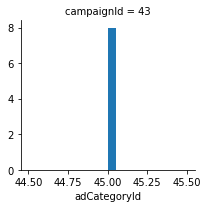

In [14]:
g = sns.FacetGrid(ad_feature, col='campaignId')
g.map(plt.hist, 'adCategoryId', bins=20)

### 根据数据分析的结果，对特征进行处理（归一化，独热编码，合并，删除等等），得到最终的特征向量

In [ ]:
"""
此处进行各种处理
"""

# 得到最终的数字特征
final_user_feature = pd.DataFrame()
final_ad_feature = pd.DataFrame()


### 将广告特征与用户特征合并到train_df和test_df中，生成训练数据

In [31]:
train_df.head()

,aid,uid,label
0,1,1,1
1,2,2,1
2,3,3,-1
3,4,4,-1
4,5,5,1


In [75]:
# 这里要使用处理后的final_user_feature和final_ad_feature
train_merged_1 = pd.merge(train_df, user_feature, on='uid')
test_merged_1 = pd.merge(test_df, user_feature, on='uid')
train_merged_1

,aid,uid,label,age,gender,marriageStatus,education,consumptionAbility,LBS,interest1,...,kw3,topic1,topic2,topic3,appIdInstall,appIdAction,ct,os,carrier,house
0,1,1,1,7,1,0,3,1,6,1 2,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
1,2,2,1,7,1,0,3,1,6,1 2,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
2,3,3,-1,7,1,0,3,1,6,1 2,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
3,4,4,-1,2,1,0,3,1,6,1 2,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
4,5,5,1,7,1,0,3,1,6,1 2,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
5,6,6,-1,8,1,0,3,1,6,1 2,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
6,7,7,1,7,1,0,3,1,6,1 2,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1
7,10,10,-1,7,1,0,3,1,6,1 2,...,2,34,35,65,23 23 29 43,43 29,3,1,2,1


In [76]:
train_merged_2 = pd.merge(train_merged_1, ad_feature, on='aid')
test_merged_2 = pd.merge(test_merged_1, ad_feature, on='aid')
train_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 33 columns):
aid                   4 non-null int64
uid                   4 non-null int64
label                 4 non-null int64
age                   4 non-null int64
gender                4 non-null int64
marriageStatus        4 non-null int64
education             4 non-null int64
consumptionAbility    4 non-null int64
LBS                   4 non-null int64
interest1             4 non-null object
interest2             4 non-null int64
interest3             4 non-null int64
interest4             4 non-null int64
interest5             4 non-null int64
kw1                   4 non-null int64
kw2                   4 non-null int64
kw3                   4 non-null int64
topic1                4 non-null int64
topic2                4 non-null int64
topic3                4 non-null int64
appIdInstall          4 non-null object
appIdAction           4 non-null object
ct                    4 non-null int64

In [80]:
train_feature = train_merged_2.drop('label', axis=1)
train_label = train_merged_2['label']

# 为了防止过拟合，需要从训练集中划分出一个验证集来
X_train, X_test, y_train, y_test = train_test_split(train_feature, train_label, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 此数据集的测试集中没有label，仅用于提交结果，所以需要在训练完毕后对此集做推理运算，得出label
test_feature = test_merged_2

(3, 32)
(1, 32)
(3,)
(1,)


## 通过得到的特征向量与标签，用tensorflow搭建神经网络进行训练

In [43]:
import tensorflow as tf

In [ ]:
# 设计神经网络结构
def build_arch(inputs):
    layer1 = tf.layers.dense(inputs, 128, activation=tf.nn.relu)
    layer2 = tf.layers.dense(layer1, 128, activation=tf.nn.relu)
    layer3 = tf.layers.dense(layer2, 128, activation=tf.nn.relu)
    outputs = tf.layers.dense(layer3, 1, activation=tf.nn.relu)
    
    return outputs

In [ ]:
# 设计损失函数
def build_loss(outputs, labels):
    loss = tf.nn.softmax_cross_entropy_with_logits(outputs, labels)
    return loss

In [ ]:
# 设计分数统计函数
def build_score(outputs, labels):
    score = 0
    return score

In [ ]:
# 获取上一次保存的模型
def get_last_state(logdir, num_batch):
    ckpt = tf.train.get_checkpoint_state(logdir)
    if ckpt and ckpt.model_checkpoint_path:
        # Restores from checkpoint
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        global_step = int(ckpt_name.split('-')[-1])
        last_epoch = global_step // num_batch
        last_step = global_step % num_batch
    else:
        global_step = 0
        last_epoch = 0
        last_step = 0
    return ckpt, global_step, last_epoch, last_step

### 构建计算图

In [ ]:
# 调试超参
lr = 0.1
batch_size = 128
epoch = 1
logdir = 'log/'
save_checkpoint_steps = 20
save_summaries_steps = 10

In [ ]:
tf.reset_default_graph()
outputs = build_arch(X_train)
loss = build_loss(outputs, y_train)
score = build_score(outputs, y_train)
opt = tf.train.AdamOptimizer(lr).minimize(loss)

### 训练

In [ ]:
num_batch = X_train.shape[0] // batch_size
ckpt, global_step, last_epoch, last_step = get_last_state(logdir, num_batch)
init_op = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init_op)
    train_writer = tf.summary.FileWriter(logdir + '/train', sess.graph)
    
    if ckpt and ckpt.model_checkpoint_path:
        # 加载上次保存的模型
        saver.restore(sess, ckpt.model_checkpoint_path)
    # 计算图结构分析
    param_stats = tf.contrib.tfprof.model_analyzer.print_model_analysis(
            tf.get_default_graph(),
            tfprof_options=tf.contrib.tfprof.model_analyzer.TRAINABLE_VARS_PARAMS_STAT_OPTIONS)
    print('total_params: %d\n' % param_stats.total_parameters)
    
    for e in range(last_epoch, epoch):
        print('Training for epoch ' + str(epoch+1) + '/' + str(epoch) + ':')
        
        bar = tqdm(range(last_step, num_batch), initial=last_step, total=num_batch, ncols=100, leave=False,
                       unit='b')
        for _ in bar:
            if global_step % save_summaries_steps == 0:
                # train
                _, train_score, summary_str = sess.run(
                        [opt, score, summary])
                train_writer.add_summary(summary_str, global_step)
                bar.set_description('tr_acc:{}'.format(train_score))
            else:
                sess.run(opt)

            global_step += 1
            if global_step % save_checkpoint_steps == 0:
                saver.save(sess, logdir + '/model.ckpt', global_step=global_step)

    train_writer.close()